In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r'D:\Topic 2\data.csv')
df

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
...,...,...,...
377575,5.75,5.76,3.50
377576,5.69,5.75,3.61
377577,5.66,5.68,3.56
377578,6.15,6.12,3.74


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [6]:
X = df

In [7]:
X_train,X_test=train_test_split(X,test_size=0.3,random_state=7)

In [8]:
X_train.shape,X_test.shape

((264306, 3), (113274, 3))

In [9]:
from sklearn.cluster import KMeans

In [10]:
km = KMeans(n_clusters=3,random_state=7)

In [11]:
km.fit(X_train)

KMeans(n_clusters=3, random_state=7)

In [14]:
km.cluster_centers_

array([[4.69648145, 4.70545665, 2.89926299],
       [6.22931163, 6.22888305, 3.84968493],
       [7.56414918, 7.56087712, 4.66366827]])

In [15]:
y_pred = km.predict(X_test)

In [16]:
y_pred.shape,X_test.shape

((113274,), (113274, 3))

# How to find the right K-value?
We use L-bow method

In [17]:
#Iterate KMeans for k=2 to 10
# Store the values inertia for every K
#Plot the inertia values

In [20]:
inertia_list=[]
for k in range(2,11):
    km=KMeans(n_clusters  = k,random_state=7)
    km.fit(X_train)
    inertia_list.append(km.inertia_)
print(inertia_list)

[238229.17433404544, 127039.00593010634, 76622.80067953498, 61747.27883369126, 48584.1221387025, 36463.6604899308, 30298.82138487768, 23681.773565636424, 21559.671910130448]


### In the following graph look for a sharp bend

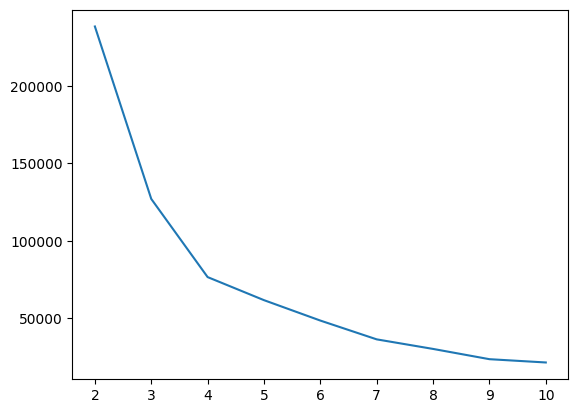

In [22]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,11)),inertia_list)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X_test,y_pred)

NameError: name 'X' is not defined

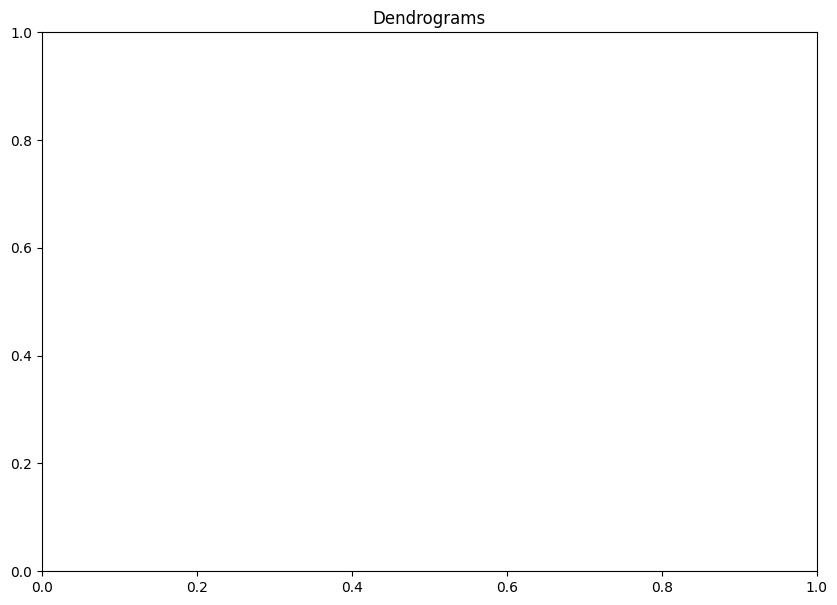

In [7]:
# Hierrarchical Clustering


import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X.iloc[:500,:],method='ward'))
plt.axhline(y=50,color='r',linestyle='--')

from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(2)

ac.fit(X_train.iloc[:500,:])